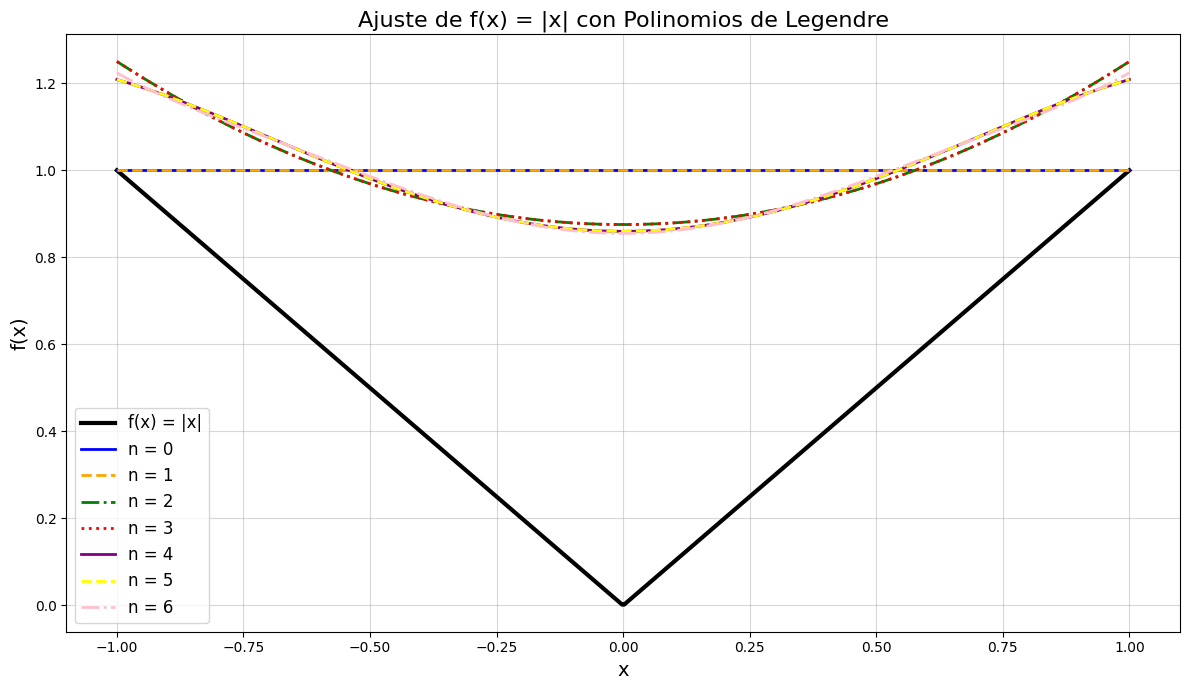

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import legendre #definir pol legendre
from scipy.special import roots_legendre #cuadratura de Gauss-legendre para calcular integrales coef a_i

# definición de la función 
def f(x):
    return np.abs(x)

# grado máximo del polinomio
n_max = 6

# valores para graficar
x_vals = np.linspace(-1, 1, 500)
f_vals = f(x_vals)

# cálculo de los coeficientes a_i y las aproximaciones
approximations = []

# raíces y pesos de Gauss-legendre
N_puntos = 50  # puntos arbitrarios para aumentar la precision
x_gauss, w_gauss = roots_legendre(N_puntos)

for n in range(n_max + 1):
    # calculo los coeficientes a_i usando Gauss-legendre
    coefficients = []
    for i in range(n + 1):
        P_i = legendre(i)  # polinomio de Legendre de grado i
        # calcular el coeficiente a_i
        a_i = np.sum(w_gauss * f(x_gauss) * P_i(x_gauss))
        coefficients.append(a_i)
    
    # construir la suma pedida: sum_{i=0}^n a_i * P_i(x)
    approx_f = sum(a_i * legendre(i)(x_vals) for i, a_i in enumerate(coefficients))
    approximations.append(approx_f)

# gráfico colorido para distinguir mejor las líneas 
plt.figure(figsize=(12, 7))
plt.plot(x_vals, f_vals, label="f(x) = |x|", color="black", linewidth=3)
styles = ['-', '--', '-.', ':', '-', '--', '-.']
colors = ['blue', 'orange', 'green', 'red', 'purple', 'yellow', 'pink']

for n, (approx, style, color) in enumerate(zip(approximations, styles, colors)):
    plt.plot(x_vals, approx, linestyle=style, color=color, label=f"n = {n}", linewidth=2)

plt.title("Ajuste de f(x) = |x| con Polinomios de Legendre", fontsize=16)
plt.xlabel("x", fontsize=14)
plt.ylabel("f(x)", fontsize=14)
plt.legend(fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()